# Análise Exploratória dos Dados

In [83]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

pd.set_option('max_rows', 500)

In [2]:
data_path = 'dataset'
files = [x for x in os.listdir(data_path) if x.endswith('.csv')]
files

['BD_SERVICOS.csv', 'BD_CONSUMO.csv', 'BD_DEM_TIME.csv']

## Variáveis de Ambiente

In [3]:
ano_atual = 2021
ano_antigo = 1900

# BD_DEM_TIME.csv

In [106]:
df_bem_time = pd.read_csv(os.path.join(data_path, 'BD_DEM_TIME.csv'))
df_bem_time

,KEY,SEXO,DTA_NASC,ESTADO,TIME
0,2421280,M,1994.0,Minas Gerais,Cruzeiro
1,1604566,M,1990.0,Bahia,Flamengo
2,133472,M,1985.0,Rio de Janeiro,Botafogo
3,1069773,M,1989.0,Rio Grande do Sul,Gremio
4,2083240,M,1994.0,Sao Paulo,Santos
...,...,...,...,...,...
951459,2372668,M,1994.0,Rio Grande do Sul,Gremio
951460,1640963,M,1988.0,Sao Paulo,Sao Paulo
951461,810316,M,1982.0,Sao Paulo,Corinthians
951462,3113267,NaN,NaN,Rio de Janeiro,Botafogo


## Data de Nascimento

In [107]:
column = 'DTA_NASC'
mask = (df_bem_time[column]>ano_antigo) & (df_bem_time[column]<ano_atual)
df_bem_time.loc[~mask, column] = None # joga quem ta fora da data para None
df_bem_time['IDADE'] = ano_atual - df_bem_time[column]
df_bem_time = df_bem_time.drop(columns=[column])

## Idade

<AxesSubplot:title={'center':'IDADE'}, ylabel='Frequency'>

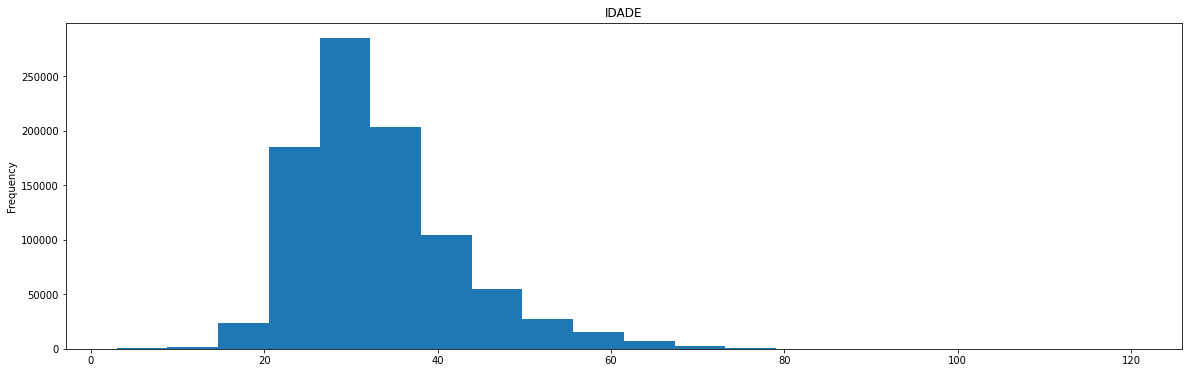

In [108]:
# Existem valores estranhos para Data de Nascimento
column='IDADE'
df_bem_time[column].plot.hist(figsize=(20, 6), title=column, bins=20)

In [112]:
df_bem_time.describe()

,KEY,IDADE
count,9.514640e+05,912526.000000
mean,1.708691e+06,33.298431
std,9.852548e+05,9.324710
min,3.000000e+00,3.000000
25%,8.548928e+05,27.000000
50%,1.709532e+06,32.000000
75%,2.562060e+06,38.000000
max,3.414422e+06,120.000000


In [111]:
# Quantidade de Idades Nulas
column='IDADE'
df_bem_time[column].isna().sum()

38938

## Sexo

In [113]:
column='SEXO'
mask = (df_bem_time[column] == 'M') | (df_bem_time[column] == 'F')
df_bem_time.loc[~mask, 'SEXO'] = None

<AxesSubplot:title={'center':'SEXO'}>

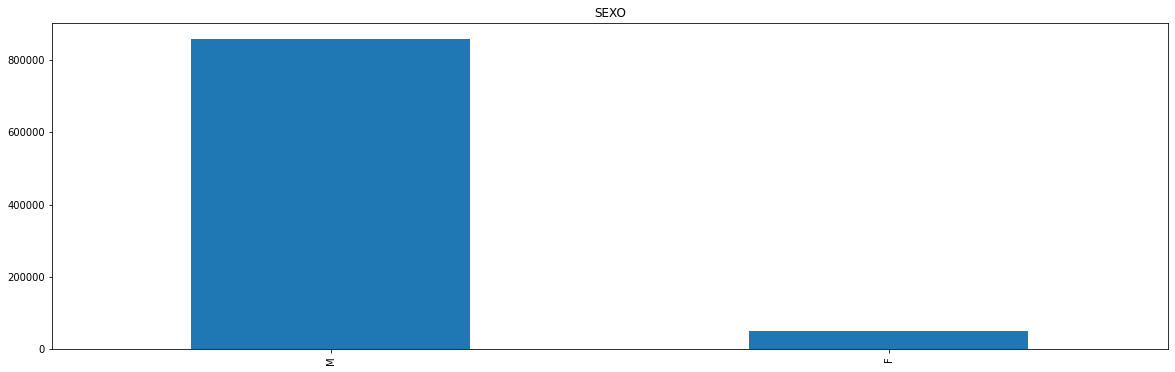

In [124]:
df_bem_time[column].value_counts().plot.bar(figsize=(20, 6), title=column)

In [118]:
df_bem_time[column].value_counts(dropna=False).to_frame()

,SEXO
M,858914
F,51345
NaN,41205


## Estado

In [130]:
column = 'ESTADO'
df_bem_time.loc[df_bem_time[column]=='Nao informado', column] = None

<AxesSubplot:title={'center':'ESTADO'}>

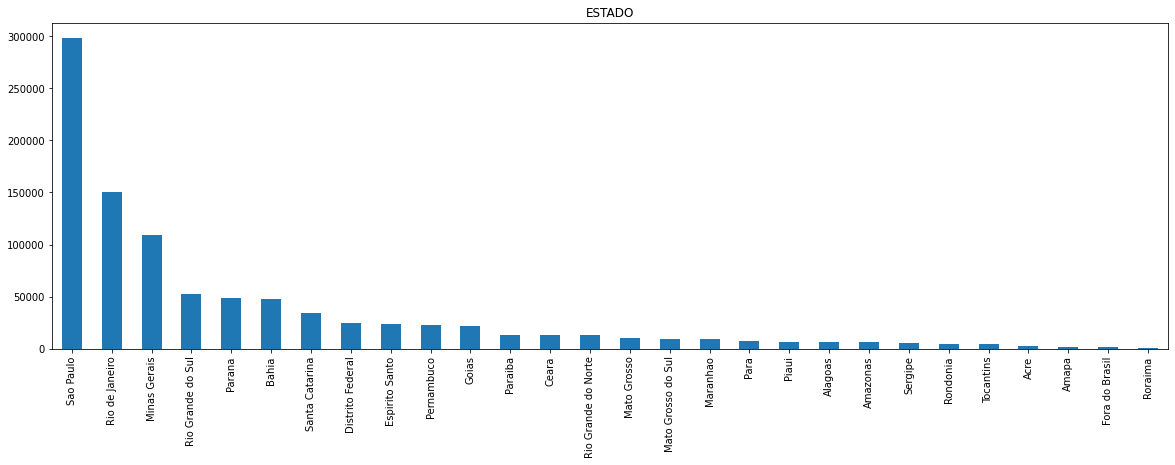

In [134]:
column = 'ESTADO'
df_bem_time[column].value_counts().plot.bar(figsize=(20, 6), title=column)

In [132]:
df_bem_time[column].value_counts(dropna=False).to_frame()

,ESTADO
Sao Paulo,298040
Rio de Janeiro,150608
Minas Gerais,108878
Rio Grande do Sul,52139
Parana,49036
Bahia,47848
Santa Catarina,34581
Distrito Federal,24311
Espirito Santo,23790
Pernambuco,23001


## Time

Total de Times: 29


<AxesSubplot:title={'center':'TIME'}>

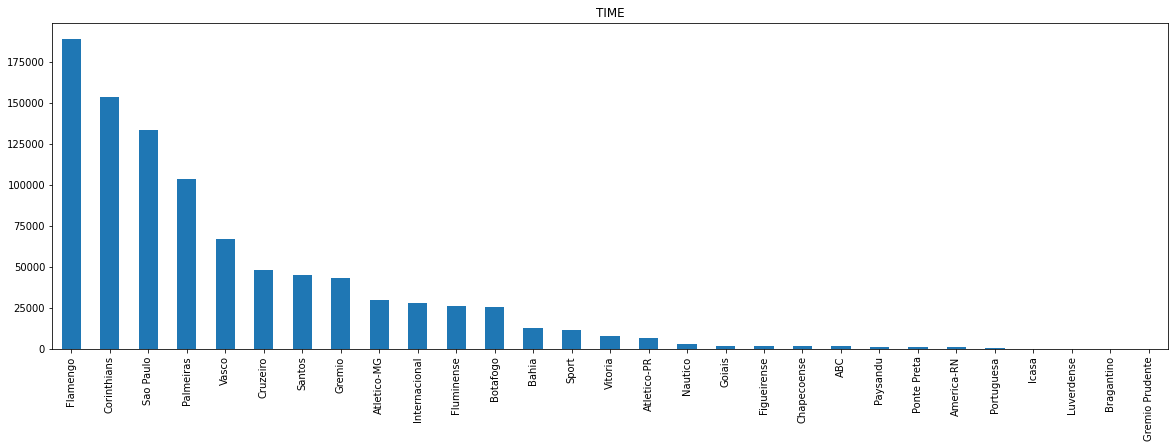

In [140]:
column='TIME'
print('Total de Times:', len(df_bem_time[column].unique()))
df_bem_time[column].value_counts().plot.bar(figsize=(20, 6), title=column)

In [136]:
column='TIME'
df_bem_time[column].value_counts(dropna=False).to_frame()

,TIME
Flamengo,189334
Corinthians,153985
Sao Paulo,133624
Palmeiras,103745
Vasco,67106
Cruzeiro,48067
Santos,45403
Gremio,43627
Atletico-MG,30082
Internacional,28143


# BD_SERVICOS.csv

In [141]:
df_servicos = pd.read_csv(os.path.join(data_path, 'BD_SERVICOS.csv'))
df_servicos

,KEY,GLOBOPLAY,PREMIERE_PLAY,GLOBOSAT_PLAY,COMBATE,CARTOLA_PRO
0,2812202,0,0,0,0,0
1,609314,0,0,0,0,0
2,1837779,0,0,0,0,0
3,950603,0,0,0,0,0
4,2105538,0,0,1,0,0
...,...,...,...,...,...,...
951459,1278011,1,0,1,0,1
951460,2042105,1,0,0,0,1
951461,1898803,1,1,1,0,1
951462,3106291,1,0,1,0,1


In [7]:
df_servicos.describe() # São colunas categóricas de fato

,KEY,GLOBOPLAY,PREMIERE_PLAY,GLOBOSAT_PLAY,COMBATE,CARTOLA_PRO
count,9.514640e+05,951464.000000,951464.000000,951464.000000,951464.000000,951464.000000
mean,1.708691e+06,0.401452,0.185091,0.237106,0.017795,0.154316
std,9.852548e+05,0.490192,0.388371,0.425308,0.132205,0.361251
min,3.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.548928e+05,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.709532e+06,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.562060e+06,1.000000,0.000000,0.000000,0.000000,0.000000
max,3.414422e+06,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

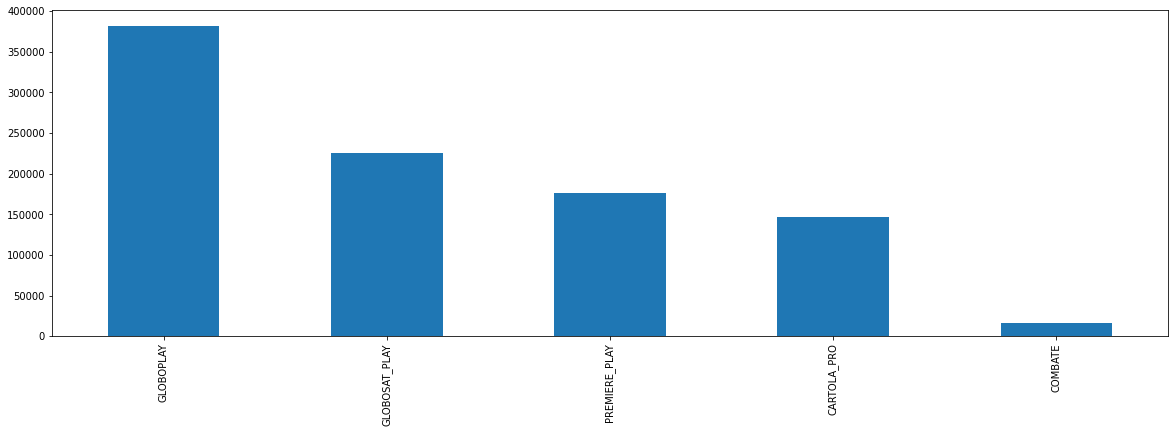

In [166]:
df_servicos.drop(columns=['KEY']).sum().sort_values(ascending=False).plot.bar(figsize=(20, 6))

<AxesSubplot:title={'center':'Número de Serviços por Usuário'}>

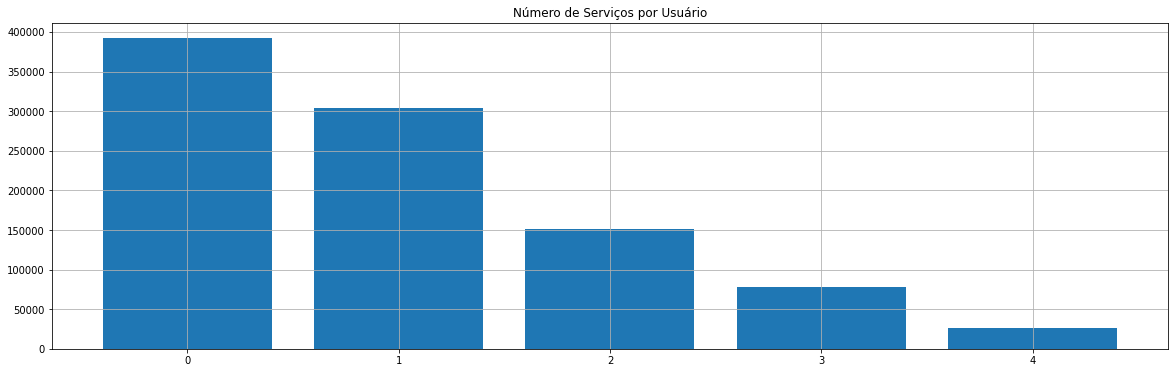

In [165]:
plt.title('Número de Serviços por Usuário')
df_servicos.drop(columns=['KEY']).sum(axis=1).hist(figsize=(20, 6), bins=5, align='left', rwidth=0.8)

# BD_CONSUMO.csv

In [256]:
df_consumo = pd.read_csv(os.path.join(data_path, 'BD_CONSUMO.csv'))
df_consumo = df_consumo.dropna()
df_consumo.shape

(14174706, 3)

In [176]:
df_group_consumo = df_consumo.groupby('KEY')

<AxesSubplot:>

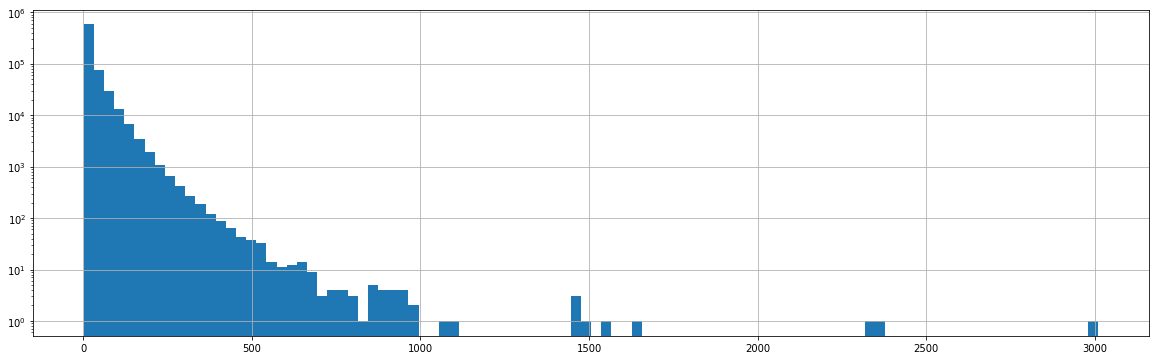

In [206]:
df_group_consumo.count()['tempo'].hist(figsize=(20, 6), bins=100, log=True)

In [207]:
df_group_consumo.count()['tempo'].describe(percentiles=[.25, .5, .75, .9, .95, .99, .999]).round(2).astype(str).to_frame()

,tempo
count,711705.0
mean,19.92
std,35.1
min,1.0
25%,2.0
50%,7.0
75%,23.0
90%,53.0
95%,82.0
99%,161.0


## tempo

<AxesSubplot:>

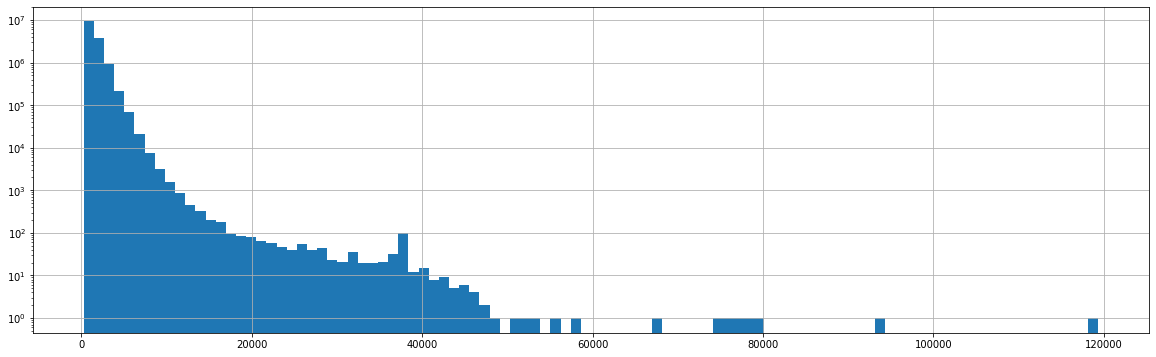

In [191]:
df_consumo['tempo'].hist(figsize=(20, 6), bins=100, log=True)

In [202]:
df_consumo[df_consumo['tempo'] > 7550]

,KEY,tempo,url
1098,1367044,7656.0,https://globoesporte.globo.com/futebol/times/f...
2022,2735619,9209.0,https://globoesporte.globo.com/futebol/times/s...
2372,2226394,7743.0,http://globoesporte.globo.com/sp/santos-e-regi...
3476,3306127,8826.0,https://globoesporte.globo.com/futebol/selecoe...
4829,2079106,9564.0,http://globoesporte.globo.com/ba/futebol/notic...
...,...,...,...
14167280,1980873,7599.0,https://globoesporte.globo.com/ba/futebol/time...
14167899,2695456,8473.0,https://globoesporte.globo.com/mg/futebol/noti...
14169515,1837580,9043.0,https://globoesporte.globo.com/sp/santos-e-reg...
14173108,170879,7732.0,http://globoesporte.globo.com/rs/futebol/times...


In [204]:
df_consumo['tempo'].describe(percentiles=[.25, .5, .75, .9, .95, .99, .999]).round(2).astype(str).to_frame()

,tempo
count,14174706.0
mean,1362.17
std,978.27
min,292.0
25%,726.0
50%,1150.0
75%,1754.0
90%,2561.0
95%,3142.0
99%,4731.0


## links

In [448]:
am = df_consumo[:100000].copy()

In [449]:
# remove o nome do site, pega apenas os argumentos
am['url'] = am['url'].str.split(".com/").str.get(1)

In [450]:
split_futebol = am['url'].str.split("futebol/")

In [451]:
am['url_region'] = split_futebol.str.get(0).str[:-1]

In [452]:
am['url_region'] = am['url_region'].str.split("/").str.get(0)

In [453]:
am.loc[am['url_region'].str.len() > 2, 'url_region'] = None

In [454]:
am.loc[am['url_region'] == '', 'url_region'] = None

In [455]:
split_noticia = split_futebol.str.get(1).str.split("noticia/")

In [456]:
am['url_noticia'] = split_noticia.str.get(1)

In [457]:
am['url_campeonato'] = split_noticia.str.get(0).str.split("times/").str.get(0).str[:-1]

In [458]:
am['url_campeonato'] = am['url_campeonato'].str.split("/").str.get(0)

In [459]:
am.loc[am['url_campeonato'] == '', 'url_campeonato'] = None

In [460]:
am['url_times'] = split_noticia.str.get(0).str.split("times/").str.get(1).str[:-1]

In [461]:
am['url_times'] = am['url_times'].str.split("/").str.get(0)

In [462]:
am.loc[am['url_times'] == '', 'url_times'] = None

In [463]:
am.drop(columns=['url'], inplace=True)

In [464]:
am

,KEY,tempo,url_region,url_noticia,url_campeonato,url_times
0,1666965,1532.0,mg,diretor-de-futebol-do-atletico-mg-revela-consu...,None,siga-atletico-mg
1,2428750,965.0,None,NaN,None,botafogo
2,23359,464.0,pb,NaN,campeonato-paraibano,NaN
3,2451676,3286.0,sp,conmebol-abre-investigacao-para-verificar-se-s...,None,santos
4,707389,1195.0,None,lateral-da-base-do-palmeiras-releva-chegadas-f...,None,palmeiras
...,...,...,...,...,...,...
99995,1547217,1458.0,None,douglas-volta-a-sao-paulo-mancando-e-deve-desf...,None,corinthians
99996,2682073,1357.0,None,piris-chega-ao-rio-para-assinar-com-o-flamengo...,None,flamengo
99997,2960170,3187.0,None,homens-de-ferro-artilheiro-da-hora-12o-jogador...,brasileirao-serie-a,NaN
99998,1666813,899.0,None,NaN,None,flamengo


## url_region

In [465]:
am['url_region'].unique()

array(['mg', None, 'pb', 'sp', 'rj', 'al', 'pr', 'rs', 'sc', 'ce', 'go',
       'ba', 'pe', 'rn', 'df', 'pi', 'am', 'pa', 'ac', 'es', 'ma', 'mt',
       'to', 'se', 'ms', 'ap', 'ro'], dtype=object)

<AxesSubplot:title={'center':'url_region'}>

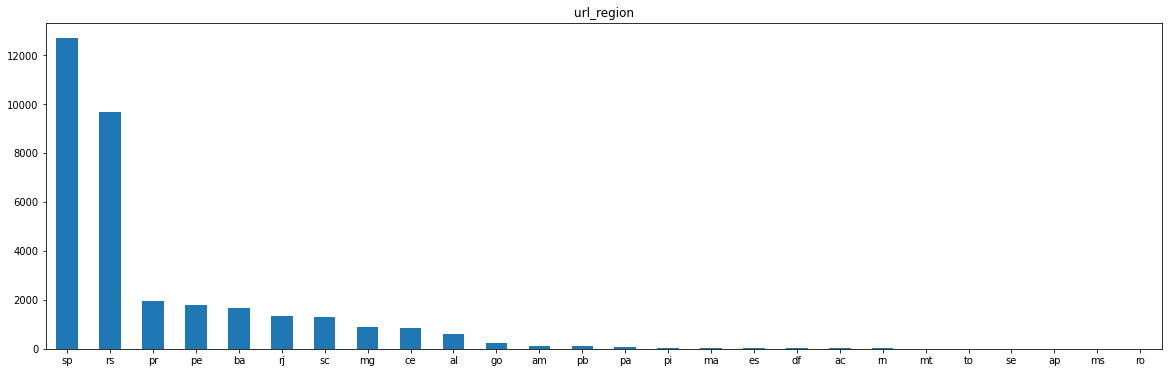

In [398]:
am['url_region'].value_counts().plot.bar(figsize=(20, 6), title='url_region', rot=0)

In [396]:
am['url_region'].value_counts(dropna=False)

NaN    66454
sp     12687
rs      9683
pr      1958
pe      1778
ba      1665
rj      1354
sc      1310
mg       875
ce       839
al       587
go       245
am       129
pb        98
pa        78
pi        53
ma        43
es        38
df        33
ac        31
rn        24
to        12
mt        12
se         7
ap         3
ms         3
ro         1
Name: url_region, dtype: int64

## url_noticia

In [402]:
am['url_noticia'].unique()

array(['diretor-de-futebol-do-atletico-mg-revela-consulta-da-roma-por-maidana.ghtml',
       nan,
       'conmebol-abre-investigacao-para-verificar-se-santos-escalou-sanchez-de-forma-irregular.ghtml',
       ...,
       'mosaico6-festa-tera-cascata-de-papel-picado-bandeiroes-e-efeito-de-quase-360.ghtml',
       'gerson-gusmao-minimiza-jejum-do-operario-pr-e-mira-mata-mata-criamos-gordura.ghtml',
       '2014/11/ceni-fala-do-filho-que-teve-fora-do-casamento-assumi-porque-o-amo.html'],
      dtype=object)

## url_campeonato

In [466]:
am['url_campeonato'].unique()

array([None, 'campeonato-paraibano', 'brasileirao-serie-a',
       'libertadores', 'copa-do-brasil', 'carioca-serie-b1',
       'mineiro-modulo-2', nan, 'copa-sul-americana', 'carioca-serie-c',
       'voce-escala', 'gaucho-segunda-divisao', 'mineiro-segunda-divisao',
       'campeonato-paulista', 'carioca-serie-b2', 'mundial-de-clubes',
       'copa-paulista', 'paulista-segunda-divisao',
       'simulador-do-campeao-brasileiro', 'campeonato-brasileiro',
       'selecoes', 'catarinense-segunda-divisao', 'copa-espirito-santo',
       'campeonato', 'campeonato-gaucho', 'copa-sp-de-futebol-junior',
       'paulista-serie-a2', 'campeonato-mineiro',
       'mapa-das-curtidas-2017', 'taca-bh-sub-17', 'campeonato-carioca',
       'copa-rio', 'campeonato-potiguar', 'liga-dos-campeoes',
       'campeonato-paranaense', 'brasileirao-serie-a%20simulador',
       'copa-verde', 'quintal-da-bola', 'futebol-feminino',
       'campeonato-acreano', 'campeonato-amazonense', 'copa-do-nordeste',
       'to

In [474]:
am['url_campeonato'].value_counts(dropna=False)

NaN                                    93483
brasileirao-serie-a                     3208
libertadores                            1416
copa-do-brasil                           997
copa-sul-americana                       189
campeonato-brasileiro                    102
selecoes                                  71
campeonato-paulista                       69
paulista-segunda-divisao                  43
voce-escala                               41
copa-paulista                             38
carioca-serie-b1                          35
catarinense-segunda-divisao               27
mineiro-segunda-divisao                   22
copa-espirito-santo                       20
taca-bh-sub-17                            20
mapa-das-curtidas-2017                    18
copa-rio                                  15
carioca-serie-c                           15
carioca-serie-b2                          14
campeonato-acreano                        12
campeonato-pernambucano                    8
campeonato

In [495]:
am[am[['url_campeonato', 'url_times']].isna().all(axis=1)]

,KEY,tempo,url_region,url_noticia,url_campeonato,url_times
5,2205445,464.0,rj,ex-capitao-do-fla-jonatas-desiste-de-retomar-a...,None,NaN
6,1099505,1656.0,al,walter-e-preso-em-maceio-por-mostrar-arma-de-b...,None,NaN
56,2473054,736.0,rs,alem-de-tite-gremio-x-flamengo-atrai-olheiros-...,None,NaN
58,3295101,2154.0,sp,sao-paulo-acerta-a-contratacao-de-everton-feli...,None,NaN
95,3357704,1896.0,rj,ex-capitao-do-fla-jonatas-desiste-de-retomar-a...,None,NaN
...,...,...,...,...,...,...
99823,955513,1225.0,ba,vencido-pelas-dores-obina-anuncia-fim-da-carre...,None,NaN
99940,580560,3753.0,sp,sao-paulo-acerta-a-contratacao-de-everton-feli...,None,NaN
99958,875165,1357.0,rj,juiza-atende-pedido-do-flu-e-determina-bloquei...,None,NaN
99968,40576,3068.0,rs,apos-reuniao-inter-fecha-contratacao-de-guerre...,None,NaN


In [497]:
am['url_noticia'].unique().shape

(3763,)

In [491]:
am[am[['url_noticia']].isna().all(axis=1)]

,KEY,tempo,url_region,url_noticia,url_campeonato,url_times
1,2428750,965.0,None,NaN,None,botafogo
2,23359,464.0,pb,NaN,campeonato-paraibano,NaN
9,3253089,539.0,None,NaN,None,palmeiras
12,1980453,735.0,None,NaN,None,flamengo
13,2802136,863.0,pr,NaN,None,atletico-pr
...,...,...,...,...,...,...
99989,479487,736.0,sp,NaN,None,santos
99990,1041053,2050.0,None,NaN,None,flamengo
99993,1291766,522.0,None,NaN,None,flamengo
99998,1666813,899.0,None,NaN,None,flamengo


In [493]:
am['url_region'].isna().sum()

66454

## url_times

In [475]:
am['url_times'].unique()

array(['siga-atletico-mg', 'botafogo', nan, 'santos', 'palmeiras',
       'cruzeiro', 'vasco', 'flamengo', 'atletico-pr', 'gremio',
       'sao-paulo', 'figueirense', 'ceara', 'fluminense', 'corinthians',
       'internacional', 'vila-nova', 'bahia', 'treze', 'santa-cruz',
       'crb', 'atletico-mg', 'londrina', 'vitoria', 'sport',
       'parana-clube', 'nautico', 'chapecoense', 'fortaleza', 'csa',
       'america-mg', 'atletico-go', 'avai', 'sao-bento', 'ponte-preta',
       'botafogo-sp', 'guarani', 'goias', 'coritiba', 'mogi-mirim',
       'paysandu', 'botafogo-pb', 'criciuma', 'remo', 'bragantino',
       'atletico-ac', 'operario-pr', 'sao-francisco', 'sao-mateus',
       'ferroviario', 'sampaio-correa', 'fast', 'juventude', 'tupi',
       'iranduba', 'tupy-es', 'cuiaba', 'brasil-de-pelotas',
       'comercial-sp', 'boa-esporte', 'parana', 'francana', 'moto-club',
       'xv-de-piracicaba', 'ferroviaria', 'olimpia-sp', 'manaus',
       'confianca', 'linhares', 'joinville', 'campi